# Повторний курс

## Завдання: 

## 1. Провести попередню обробку та розвідувальний аналіз даних

## 2. За допомогою PCA зменшити розмірність даних, дати змістовну інтерпретацію отриманим компонентам

## 3 Використовуючи дані, отримані після PCA, згрупувати країни у декілька кластерів, дати коротку характеристику отриманим кластерам

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# встановимо, що в числах типу float виводити 2 знаки після роздільника
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Для зчитування файлу, що знаходиться локально, із початковими даними у Pandas
df = pd.read_csv('index2022_changed.csv')
df

,Country Name,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Albania,3.70,23.00,15.00,18.30,30.50,2.80,40.70,-3.50,2.00,14.54,11.70,1.60,1 107.00,76.00
1,Algeria,13.80,35.00,26.00,37.20,37.80,43.90,491.50,-6.00,0.10,11.20,12.80,2.40,1 125.00,53.10
2,Angola,7.50,25.00,25.00,9.40,21.30,32.90,215.10,-4.00,-1.90,6.54,7.70,22.30,-1 866.00,127.10
3,Argentina,12.20,35.00,25.00,28.60,39.60,45.40,941.80,-10.00,-2.80,20.74,11.70,42.00,4 123.00,103.00
4,Armenia,5.70,22.00,18.00,22.50,26.50,3.00,39.40,-7.60,2.60,13.13,20.20,1.20,117,62.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Vanuatu,9.20,0.00,0.00,17.80,36.50,0.30,0.80,-9.20,1.60,2.67,2.00,2.90,30,44.20
166,Venezuela,12.60,34.00,34.00,16.70,26.90,28.40,144.70,-30.00,-23.50,5.10,9.10,2355.10,959,304.10
167,Vietnam,5.60,35.00,20.00,16.90,22.00,97.30,1058.60,2.90,6.10,10.88,2.30,3.20,15 800.00,46.60
168,Zambia,8.40,37.50,35.00,16.70,29.80,18.40,63.10,-3.50,1.90,3.43,12.20,16.40,234,117.80


In [4]:
# Перегляд загальної інформації про датасет
# Типи даних, пропущені значення
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country Name                 170 non-null    object 
 1   Tariff Rate (%)              170 non-null    float64
 2   Income Tax Rate (%)          170 non-null    float64
 3   Corporate Tax Rate (%)       170 non-null    float64
 4   Tax Burden % of GDP          170 non-null    float64
 5   Gov't Expenditure % of GDP   170 non-null    float64
 6   Population (Millions)        170 non-null    float64
 7   GDP (Billions, PPP)          170 non-null    float64
 8   GDP Growth Rate (%)          170 non-null    float64
 9   5 Year GDP Growth Rate (%)   170 non-null    float64
 10  GDP per Capita (PPP)         170 non-null    float64
 11  Unemployment (%)             170 non-null    float64
 12  Inflation (%)                170 non-null    float64
 13  FDI Inflow (Millions

In [5]:
#Усі числові дані мають тип float64, що правильно для аналізу.

# "FDI Inflow (Millions)" має тип object, хоча, повинен бути числовим (float64). 

#Пропущені значення

#Відсутні (Non-Null Count для всіх стовпців = 170)  не потрібно заповнювати або видаляти рядки.

In [6]:
# Описова статистика числових змінних
print(df.describe())

       Tariff Rate (%)  Income Tax Rate (%)  Corporate Tax Rate (%)  \
count           170.00               170.00                  170.00   
mean              7.92                29.01                   23.19   
std               6.59                13.35                    8.54   
min               0.00                 0.00                    0.00   
25%               2.90                20.50                   19.00   
50%               6.60                30.00                   25.00   
75%              10.57                37.38                   30.00   
max              67.70                60.00                   50.00   

       Tax Burden % of GDP  Gov't Expenditure % of GDP   \
count               170.00                       170.00   
mean                 20.46                        31.43   
std                  10.17                        11.33   
min                   1.00                        10.10   
25%                  13.22                        22.47   
50%   

In [7]:
#Препроцесинг (попередня обробка) даних:
#1.Перетворення типів даних у правильний формат.
#2. Обробка аномалій та викидів в даних.
#3. Видалення та аповнення пропусків в даних:
#4. Перетворення даних:

In [8]:
#1.Перетворення типів даних у правильний формат.

In [9]:
non_numeric_values = df['FDI Inflow (Millions)'][df['FDI Inflow (Millions)'].str.contains(r'[^\d\.]', na=False)]
print(non_numeric_values)

0        1 107.00
1        1 125.00
2       -1 866.00
3        4 123.00
5       20 146.00
          ...    
161     19 724.00
162    156 321.00
163      2 630.00
164      1 726.00
167     15 800.00
Name: FDI Inflow (Millions), Length: 97, dtype: object


In [10]:
df['FDI Inflow (Millions)'] = df['FDI Inflow (Millions)'].str.replace(r'[,\s]', '', regex=True).astype(float)

In [11]:
#Результат
df.info()
#Перетворення типів даних у правильний формат.Зроблено.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country Name                 170 non-null    object 
 1   Tariff Rate (%)              170 non-null    float64
 2   Income Tax Rate (%)          170 non-null    float64
 3   Corporate Tax Rate (%)       170 non-null    float64
 4   Tax Burden % of GDP          170 non-null    float64
 5   Gov't Expenditure % of GDP   170 non-null    float64
 6   Population (Millions)        170 non-null    float64
 7   GDP (Billions, PPP)          170 non-null    float64
 8   GDP Growth Rate (%)          170 non-null    float64
 9   5 Year GDP Growth Rate (%)   170 non-null    float64
 10  GDP per Capita (PPP)         170 non-null    float64
 11  Unemployment (%)             170 non-null    float64
 12  Inflation (%)                170 non-null    float64
 13  FDI Inflow (Millions

In [12]:
#2. Обробка аномалій та викидів в даних.

In [13]:
import pandas as pd

# Визначаємо числові стовпці
numeric_columns = df.select_dtypes(include=['number']).columns

for column in numeric_columns:
    # Обчислюємо квантилі 5% та 95%
    lower_bound = df[column].quantile(0.05)
    upper_bound = df[column].quantile(0.95)

    # Фільтруємо дані з урахуванням пропусків (NaN)
    initial_shape = df.shape[0]  # Кількість рядків перед очищенням
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Виводимо кількість видалених рядків
    removed_rows = initial_shape - df.shape[0]
    print(f'Кількість видалених рядків для стовпця {column}: {removed_rows}')

# Огляд фінального очищеного DataFrame
print("\nФінальний очищений DataFrame:")
df.info()
#Обробка аномалій та викидів в даних.Зроблено.

Кількість видалених рядків для стовпця Tariff Rate (%): 17
Кількість видалених рядків для стовпця Income Tax Rate (%): 16
Кількість видалених рядків для стовпця Corporate Tax Rate (%): 11
Кількість видалених рядків для стовпця Tax Burden % of GDP: 14
Кількість видалених рядків для стовпця Gov't Expenditure % of GDP : 12
Кількість видалених рядків для стовпця Population (Millions): 10
Кількість видалених рядків для стовпця GDP (Billions, PPP): 10
Кількість видалених рядків для стовпця GDP Growth Rate (%): 8
Кількість видалених рядків для стовпця 5 Year GDP Growth Rate (%): 7
Кількість видалених рядків для стовпця GDP per Capita (PPP): 8
Кількість видалених рядків для стовпця Unemployment (%): 6
Кількість видалених рядків для стовпця Inflation (%): 5
Кількість видалених рядків для стовпця FDI Inflow (Millions): 6
Кількість видалених рядків для стовпця Public Debt (% of GDP): 4

Фінальний очищений DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 0 to 163
Data columns (t

In [14]:
#3. Видалення та заповнення пропусків в даних:

In [15]:
# 3. Обробка пропущених значень на всякий випадок
print(df.isnull().sum())  
df = df.dropna()  

Country Name                   0
Tariff Rate (%)                0
Income Tax Rate (%)            0
Corporate Tax Rate (%)         0
Tax Burden % of GDP            0
Gov't Expenditure % of GDP     0
Population (Millions)          0
GDP (Billions, PPP)            0
GDP Growth Rate (%)            0
5 Year GDP Growth Rate (%)     0
GDP per Capita (PPP)           0
Unemployment (%)               0
Inflation (%)                  0
FDI Inflow (Millions)          0
Public Debt (% of GDP)         0
dtype: int64


In [16]:
#Пропущені значення відсутні (всі стовпці мають 0 в df.isnull().sum())
#Видалення та заповнення пропусків в даних.Зроблено.

In [17]:
print(df['Country Name'].unique())


['Albania' 'Algeria' 'Armenia' 'Azerbaijan' 'Belarus' 'Benin'
 'Bosnia and Herzegovina' 'Bulgaria' 'Cameroon' 'Costa Rica'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Honduras' 'Kazakhstan'
 'Kenya' 'Kyrgyz Republic' 'Latvia' 'Lithuania' 'North Macedonia'
 'Mauritania' 'Moldova' 'Mongolia' 'Morocco' 'Namibia' 'Nepal' 'Nicaragua'
 'Paraguay' 'Philippines' 'Romania' 'Senegal' 'Serbia' 'Togo' 'Tunisia'
 'Uganda' 'Uruguay']


In [18]:
#4. Перетворення даних:
# Вибираємо категоріальні стовпці
categorical_columns = df.select_dtypes(include=['object']).columns
# Вибираємо кількісні ознаки (числові стовпці)
numeric_columns = df.select_dtypes(include=[float, int]).columns

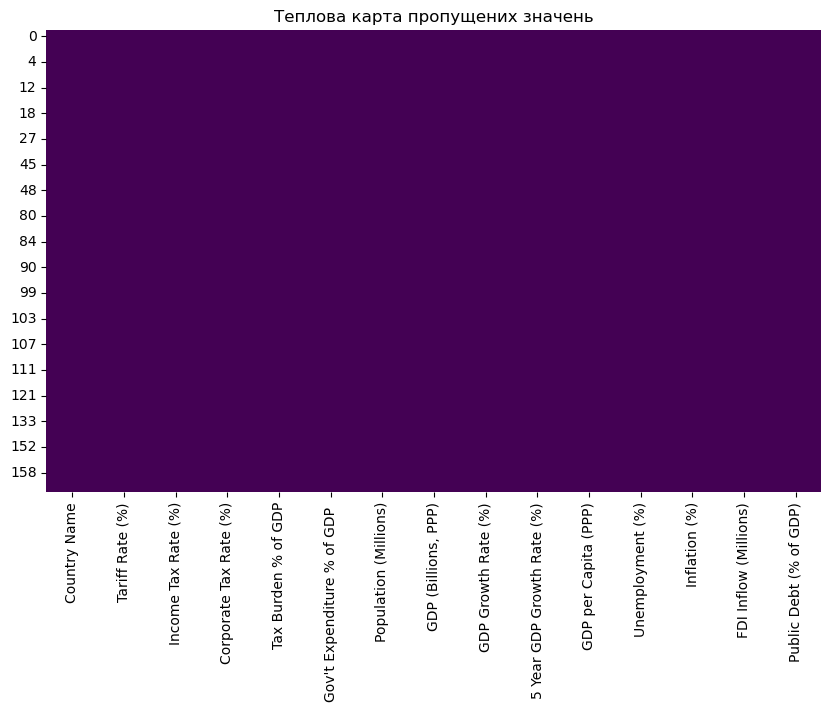

In [19]:
# Розвідувальний аналіз даних (EDA)

# 1. Перевірка наявності пропущених значень
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Теплова карта пропущених значень')
plt.show()


In [20]:
#На тепловій карті пропущених значень усі комірки мають однаковий темний колір, що свідчить про відсутність пропущених значень

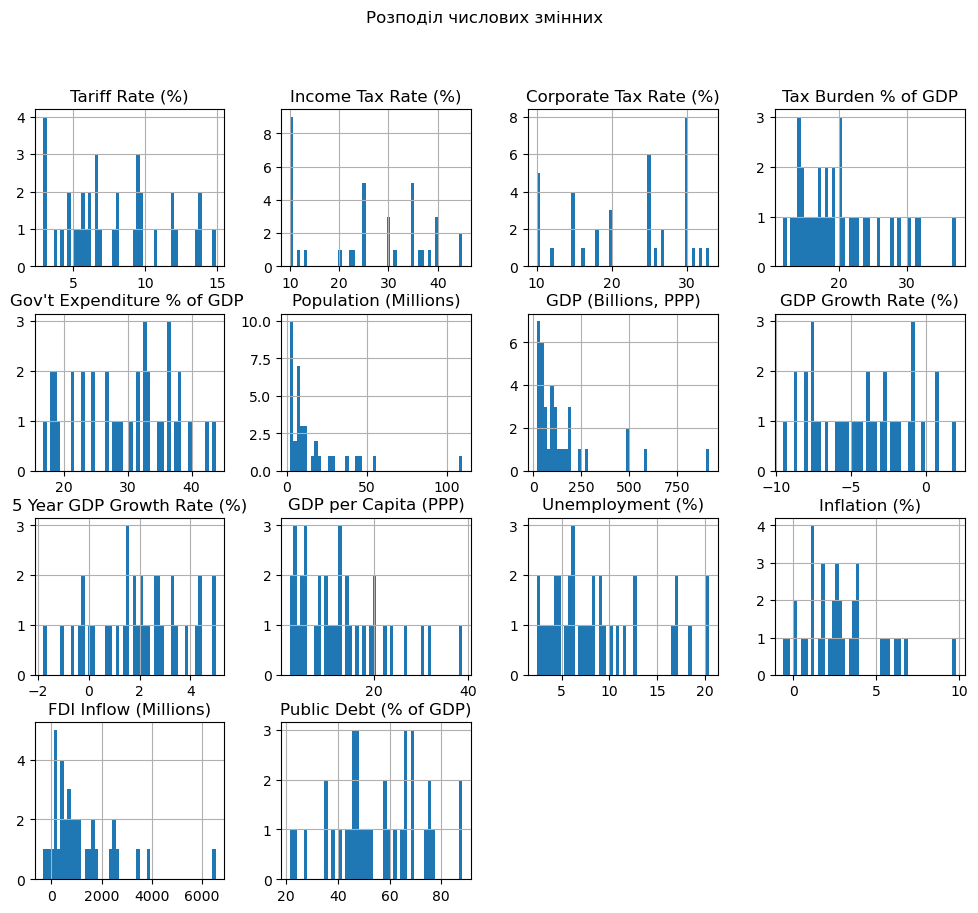

In [21]:

# 2. Гістограми для числових стовпців
df[numeric_columns].hist(figsize=(12, 10), bins=50)
plt.suptitle('Розподіл числових змінних')
plt.show()



In [22]:
#На основі гістограм можна зробити висновок, що розподіл більшості змінних наближений до нормального або має слабкі відхилення.

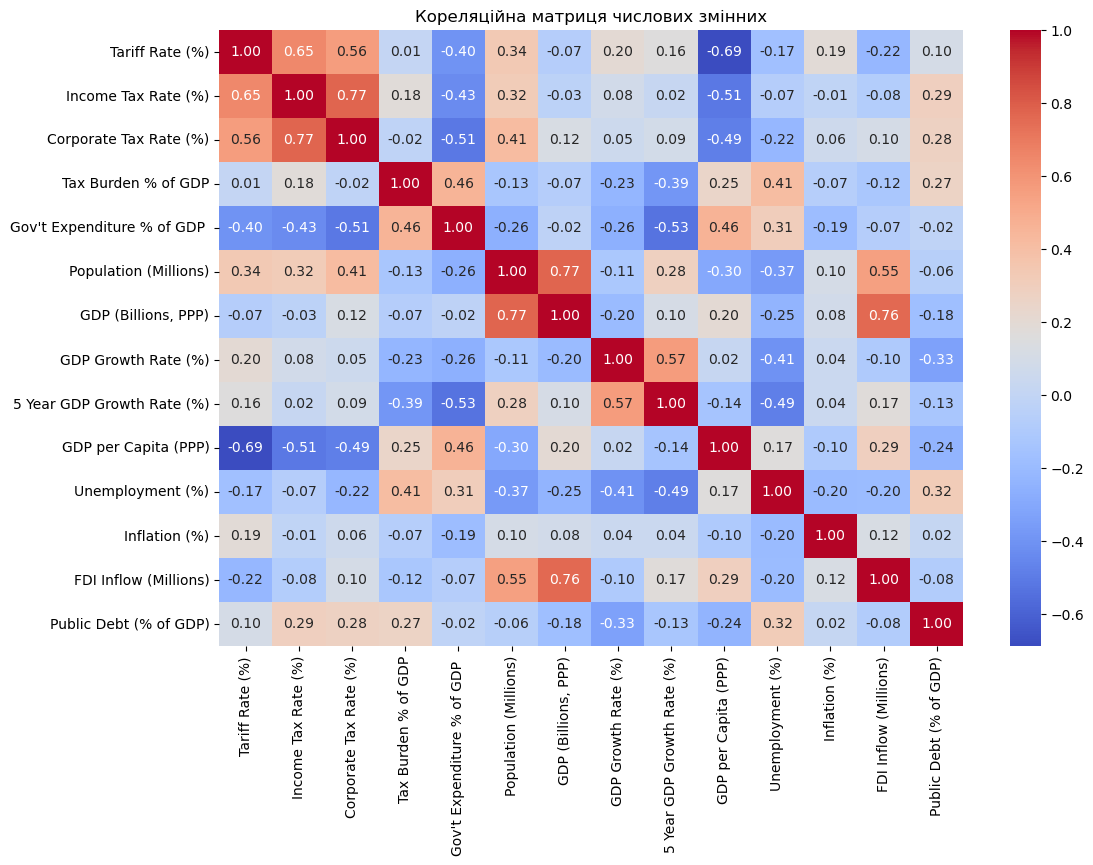

In [23]:
# 3. Кореляційна матриця для числових змінних
plt.figure(figsize=(12, 8))
corr_matrix = df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Кореляційна матриця числових змінних')
plt.show()


In [24]:
#імпортуємо клас StandardScaler з sklearn, який використовується для стандартизації даних
from sklearn.preprocessing import StandardScaler

# Ініціалізуємо StandardScaler
scaler = StandardScaler()

# Стандартизуємо кількісні ознаки
standardized_columns = scaler.fit_transform(df[numeric_columns])

# Перетворюємо стандартизовані дані в DataFrame з відповідними назвами стовпців
standardized_df = pd.DataFrame(standardized_columns, columns=numeric_columns, index=df.index)

# Видаляємо початкові кількісні ознаки
df = df.drop(columns=numeric_columns)

# Додаємо стандартизовані ознаки назад до DataFrame
df = pd.concat([df, standardized_df], axis=1)

# Перевіряємо результат
print(df.head())

   Country Name  Tariff Rate (%)  Income Tax Rate (%)  Corporate Tax Rate (%)  \
0       Albania            -1.19                -0.23                   -0.96   
1       Algeria             1.78                 0.80                    0.50   
4       Armenia            -0.61                -0.31                   -0.56   
7    Azerbaijan             0.42                -0.05                   -0.30   
12      Belarus            -0.90                -1.08                   -0.56   

    Tax Burden % of GDP  Gov't Expenditure % of GDP   Population (Millions)  \
0                 -0.32                         0.13                  -0.63   
1                  2.81                         1.11                   1.36   
4                  0.38                        -0.40                  -0.62   
7                 -0.98                         0.77                  -0.28   
12                -1.14                         1.13                  -0.31   

    GDP (Billions, PPP)  GDP Growth Ra

In [25]:
## 2. За допомогою PCA зменшити розмірність даних, дати змістовну інтерпретацію отриманим компонентам

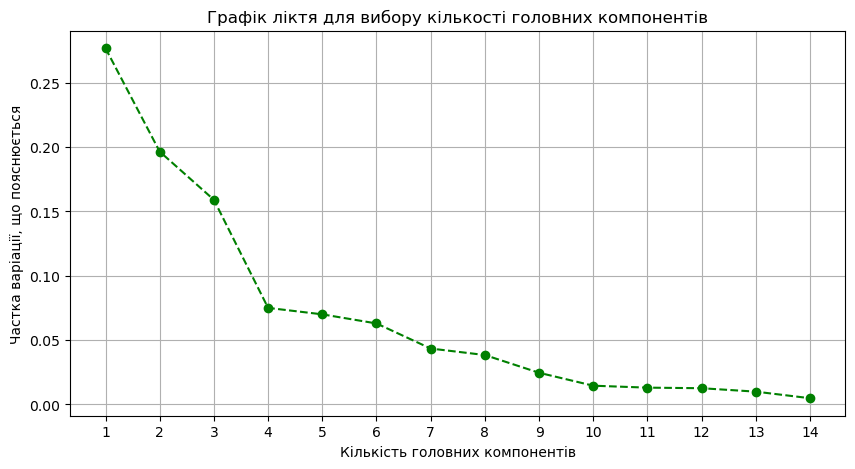

In [26]:
# Імпортуємо клас PCA з sklearn.decomposition
from sklearn.decomposition import PCA

# Ініціалізуємо PCA
pca = PCA()

# Навчаємо PCA на стандартизованих даних
pca.fit(standardized_columns)

# Визначаємо частку дисперсії, що пояснюється кожною головною компонентою
explained_variance = pca.explained_variance_ratio_

# Візуалізація: графік ліктя для вибору кількості головних компонент
plt.figure(figsize=(10, 5))
plt.plot(
    range(1, len(explained_variance) + 1), 
    explained_variance, 
    marker='o', 
    linestyle='--', 
    color='g'
)
plt.title('Графік ліктя для вибору кількості головних компонентів')
plt.xlabel('Кількість головних компонентів')
plt.ylabel('Частка варіації, що пояснюється')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

In [27]:
print(sum(explained_variance[:3]))

0.6321043265235081


In [28]:
print(sum(explained_variance[:6])) 

0.8397123507648472


In [29]:
print(sum(explained_variance[:4]))

0.7070123335203529


In [30]:
#4 компоненти,бо хороший компроміс між точністю та простотою.

In [31]:
# Імпортуємо необхідний модуль для 3D візуалізації
from mpl_toolkits.mplot3d import Axes3D

# Ініціалізуємо PCA з вибраною кількістю компонентів
pca = PCA(n_components=4)

# Перетворюємо стандартизовані дані у три головні компоненти
principalComponents = pca.fit_transform(standardized_columns)

# Створюємо новий DataFrame з головними компонентами
ndf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3','PC4'])

# Отримуємо список вагових коефіцієнтів для кожної змінної
cols = numeric_columns 
ln = pca.components_
ndf_1 = pd.DataFrame(ln, columns=cols)

print(ndf_1)

   Tariff Rate (%)  Income Tax Rate (%)  Corporate Tax Rate (%)  \
0             0.36                 0.34                    0.38   
1            -0.26                -0.30                   -0.19   
2             0.00                 0.17                    0.19   
3            -0.05                -0.29                   -0.15   

   Tax Burden % of GDP  Gov't Expenditure % of GDP   Population (Millions)  \
0                -0.18                        -0.39                   0.32   
1                -0.24                         0.00                   0.24   
2                 0.29                         0.15                   0.36   
3                -0.38                        -0.16                  -0.06   

   GDP (Billions, PPP)  GDP Growth Rate (%)  5 Year GDP Growth Rate (%)  \
0                 0.12                 0.16                        0.27   
1                 0.41                 0.10                        0.24   
2                 0.41                -0.47     

In [32]:
# Лінійні коефіцієнти компонент
components_df = pd.DataFrame(pca.components_, columns=cols, index=['PC1', 'PC2', 'PC3', 'PC4'])
print(components_df)


     Tariff Rate (%)  Income Tax Rate (%)  Corporate Tax Rate (%)  \
PC1             0.36                 0.34                    0.38   
PC2            -0.26                -0.30                   -0.19   
PC3             0.00                 0.17                    0.19   
PC4            -0.05                -0.29                   -0.15   

     Tax Burden % of GDP  Gov't Expenditure % of GDP   Population (Millions)  \
PC1                -0.18                        -0.39                   0.32   
PC2                -0.24                         0.00                   0.24   
PC3                 0.29                         0.15                   0.36   
PC4                -0.38                        -0.16                  -0.06   

     GDP (Billions, PPP)  GDP Growth Rate (%)  5 Year GDP Growth Rate (%)  \
PC1                 0.12                 0.16                        0.27   
PC2                 0.41                 0.10                        0.24   
PC3                 0.

In [33]:
# Інтерпретація для кожної компоненти
for i, component in enumerate(components_df.index):
    print(f"\nКомпонента {component}:")
    sorted_weights = components_df.loc[component].abs().sort_values(ascending=False)
    top_variables = sorted_weights.head(3)  # Топ-3 змінні з найбільшим впливом
    print(f"Топ-3 змінні, що впливають на {component}:")
    for var, weight in top_variables.items():
        print(f"  - {var} (вага: {weight:.2f})")



Компонента PC1:
Топ-3 змінні, що впливають на PC1:
  - Gov't Expenditure % of GDP  (вага: 0.39)
  - Corporate Tax Rate (%) (вага: 0.38)
  - Tariff Rate (%) (вага: 0.36)

Компонента PC2:
Топ-3 змінні, що впливають на PC2:
  - FDI Inflow (Millions) (вага: 0.42)
  - GDP (Billions, PPP) (вага: 0.41)
  - Public Debt (% of GDP) (вага: 0.33)

Компонента PC3:
Топ-3 змінні, що впливають на PC3:
  - GDP Growth Rate (%) (вага: 0.47)
  - GDP (Billions, PPP) (вага: 0.41)
  - Population (Millions) (вага: 0.36)

Компонента PC4:
Топ-3 змінні, що впливають на PC4:
  - Inflation (%) (вага: 0.67)
  - GDP Growth Rate (%) (вага: 0.38)
  - Tax Burden % of GDP (вага: 0.38)


In [34]:
#PC1: Описує економічну політику країни — державні витрати, корпоративні податки та тарифи.

#PC2: Пов'язана з інвестиціями, економічним розвитком і державним боргом.

#PC3: Відображає економічне зростання, ВВП та демографічні фактори (населення).

#PC4: Охарактеризує макроекономічну нестабільність — інфляцію, зростання ВВП і податкове навантаження.

In [35]:
## 3 Використовуючи дані, отримані після PCA, згрупувати країни у декілька кластерів, дати коротку характеристику отриманим кластерам

D:\anakonda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anakonda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anakonda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anakonda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

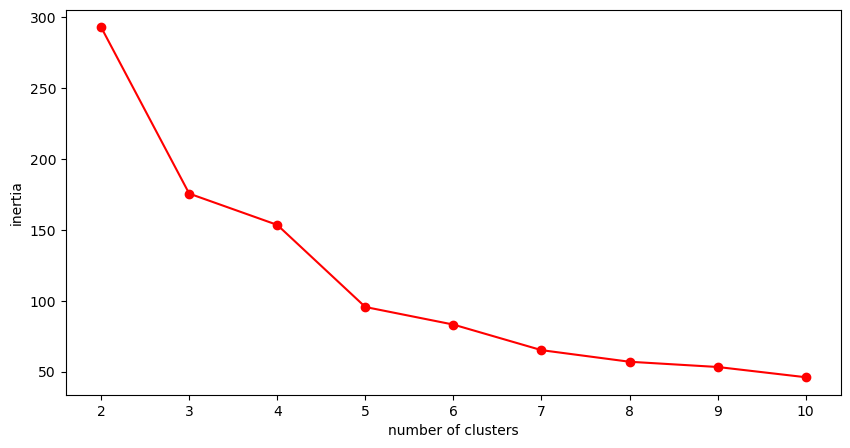

In [36]:
# реалізація методу зігнутого ліктя
from sklearn.cluster import KMeans
klusters = range(2, 11) # задамо кількість кластерів від 2 до 10 (верхня межа в функції range береться невключно)
inertias = []

for k in klusters:
    # задаємо метод кластеризації - к-середніх
    model = KMeans(n_clusters=k, random_state=51)
    #random_state дозволяє "закріпити" присвоєння кожній групі номеру кластеру при багаторазовому повторенні коду

    # оцінюємо модель
    model.fit(ndf)

    # для кожної к-ті кластерів розраховуємо inertia, розраховані значення додаємо в список inertias
    inertias.append(model.inertia_)

# зобразимо на графіку показник inertia для кожної к-ті кластерів
plt.figure(figsize=(10,5))
plt.plot(klusters, inertias, '-o', color='red')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(klusters)
plt.show()

In [37]:
# Розбиваємо дані на 6 кластерів.
kmeans = KMeans(n_clusters=6, random_state=51) 

kmeans.fit(ndf)

# Отримуємо відповідні кластери
kdf = kmeans.predict(ndf)
print(kdf)

[1 5 0 1 1 2 3 3 2 0 1 5 0 0 1 2 1 3 3 1 2 1 1 5 0 2 0 1 4 1 2 3 2 0 2 0]


D:\anakonda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
df['Cluster'] = kdf

# Перевірка результату
df.head()

,Country Name,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Cluster
0,Albania,-1.19,-0.23,-0.96,-0.32,0.13,-0.63,-0.60,0.24,0.05,0.15,0.59,-0.58,-0.07,1.27,1
1,Algeria,1.78,0.80,0.50,2.81,1.11,1.36,1.80,-0.59,-1.07,-0.22,0.80,-0.22,-0.06,-0.11,5
4,Armenia,-0.61,-0.31,-0.56,0.38,-0.40,-0.62,-0.60,-1.11,0.40,-0.00,2.27,-0.76,-0.81,0.47,0
7,Azerbaijan,0.42,-0.05,-0.30,-0.98,0.77,-0.28,-0.04,-0.02,-1.54,0.14,-0.48,-0.04,-0.52,-2.03,1
12,Belarus,-0.90,-1.08,-0.56,-1.14,1.13,-0.31,0.20,1.10,-0.72,0.78,-0.68,1.18,0.14,-0.42,1


In [39]:
#перевіримо наповненість кластерів
df[['Cluster']].value_counts()

Cluster
1          11
0           8
2           8
3           5
5           3
4           1
Name: count, dtype: int64

In [40]:
# Групуємо за кластером і виводимо країни для кожного кластера
countries_in_clusters = df.groupby('Cluster')['Country Name'].apply(list)

# Виводимо країни в кожному кластері
print(countries_in_clusters)


Cluster
0    [Armenia, Costa Rica, El Salvador, Honduras, N...
1    [Albania, Azerbaijan, Belarus, Dominican Repub...
2    [Benin, Cameroon, Kenya, Mauritania, Nepal, Se...
3    [Bosnia and Herzegovina, Bulgaria, Latvia, Lit...
4                                        [Philippines]
5                          [Algeria, Ecuador, Morocco]
Name: Country Name, dtype: object


In [41]:
# Середні за кластерами значення
num = df.select_dtypes(include=['float64']).columns

num1 = df.groupby('Cluster')[num].mean()
print(num1)


         Tariff Rate (%)  Income Tax Rate (%)  Corporate Tax Rate (%)  \
Cluster                                                                 
0                  -0.16                 0.38                    0.45   
1                  -0.64                -0.97                   -0.74   
2                   1.30                 1.02                    0.87   
3                  -0.91                -0.80                   -1.10   
4                  -0.63                 0.80                    1.04   
5                   1.05                 0.89                    0.68   

         Tax Burden % of GDP  Gov't Expenditure % of GDP   \
Cluster                                                     
0                       0.69                        -0.03   
1                      -0.72                         0.09   
2                      -0.59                        -1.14   
3                       0.82                         1.36   
4                      -1.03                     

In [42]:
#Ось коротка характеристика кластерів:

#Кластер 0: Країни з поміркованим розвитком, низькими податками, стабільною економікою. (Наприклад, Вірменія, Коста-Рика)

#Кластер 1: Країни з низьким економічним розвитком і високими податками. (Наприклад, Албанія, Азербайджан)

#Кластер 2: Країни з високим економічним зростанням і великими інвестиціями. (Наприклад, Кенія, Непал)

#Кластер 3: Країни з високими державними витратами і боргом, але середнім зростанням. (Наприклад, Болгарія, Латвія)

#Кластер 4: Малі країни з високим безробіттям і низьким економічним зростанням. (Наприклад, Філіппіни)

#Кластер 5: Країни з великими інвестиціями, але низьким економічним зростанням. (Наприклад, Марокко, Еквадор)